## kaggle competition on the data of titanic survival 

# predict survival on the titanic 


In [1]:
#import essential libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load data_set

In [2]:
train_data =pd.read_csv(r"D:\DATA SCIENTIST\kaggle\titanic\train.csv")
test_data = pd.read_csv(r"D:\DATA SCIENTIST\kaggle\titanic\test.csv")
test_id = test_data["PassengerId"]

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.isnull().sum().sum()

866

In [9]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

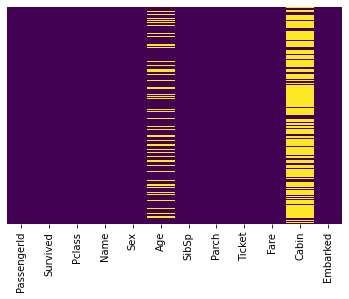

In [10]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

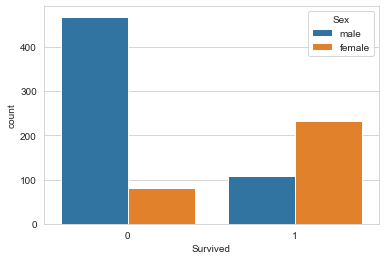

In [11]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue = "Sex",data = train_data)
plt.show()

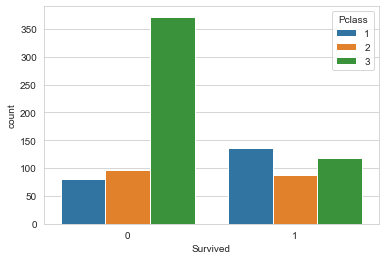

In [12]:
sns.countplot(x="Survived",hue="Pclass",data = train_data)
plt.show()

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


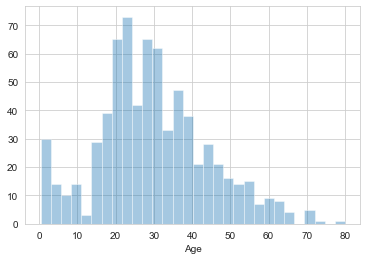

In [13]:
sns.distplot(train_data["Age"].dropna(),kde= False,bins = 30)
plt.show()

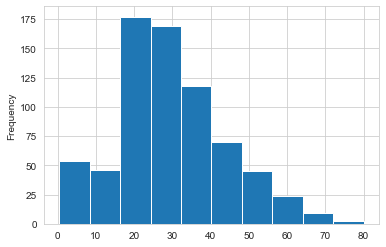

In [14]:
train_data["Age"].plot.hist()
plt.show()

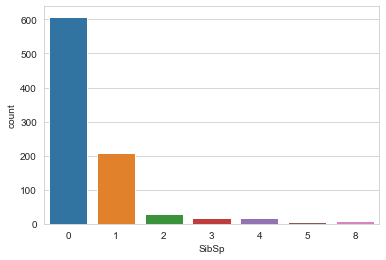

In [15]:
sns.countplot(x="SibSp",data= train_data)
plt.show()

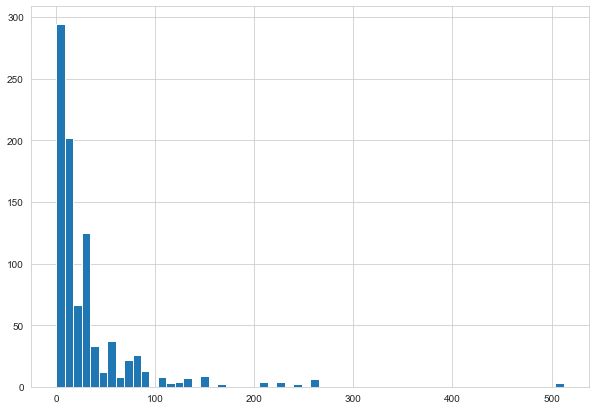

In [16]:
train_data["Fare"].hist(bins=60,figsize=(10,7))
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

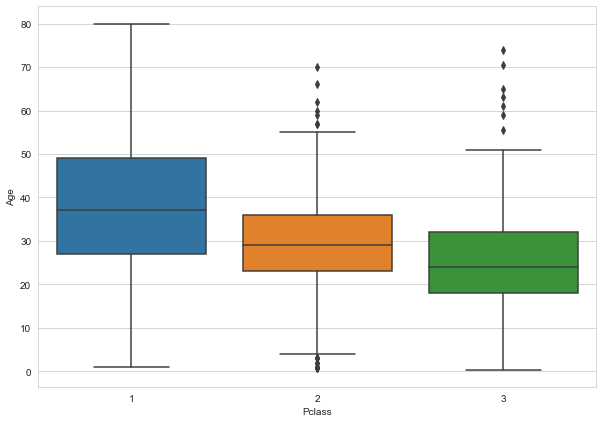

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x= "Pclass",y="Age",data=train_data)

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
train_data["Age"]=train_data[["Age","Pclass"]].apply(impute_age,axis =1)

In [20]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
null_percent = train_data.isnull().sum()/train_data.shape[0]*100
null_percent

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [22]:
col_for_drop = null_percent[null_percent > 20].keys()

In [23]:
train_data= train_data.drop(col_for_drop, "columns")
train_data.shape

C:\Users\ankit\AppData\Local\Temp/ipykernel_2652/369139899.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data= train_data.drop(col_for_drop, "columns")


(891, 11)

In [24]:
train_data = train_data.dropna()

In [25]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

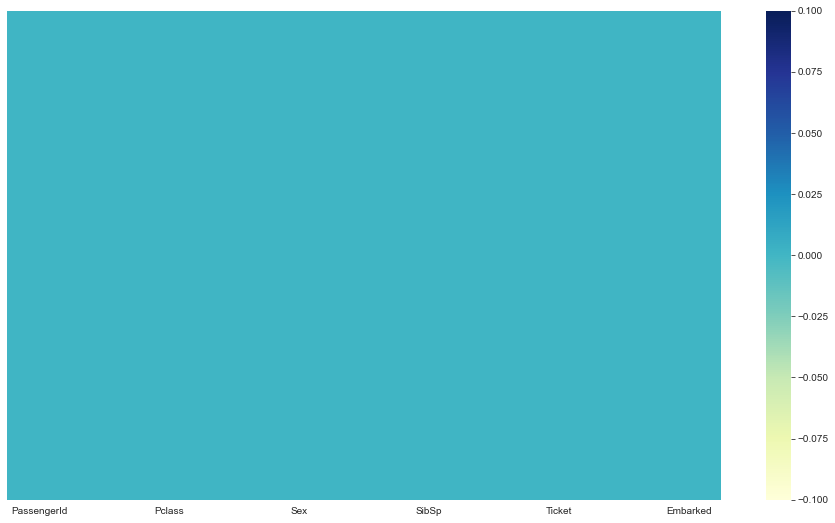

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(train_data.isnull(), xticklabels=2, yticklabels=False,cmap="YlGnBu")

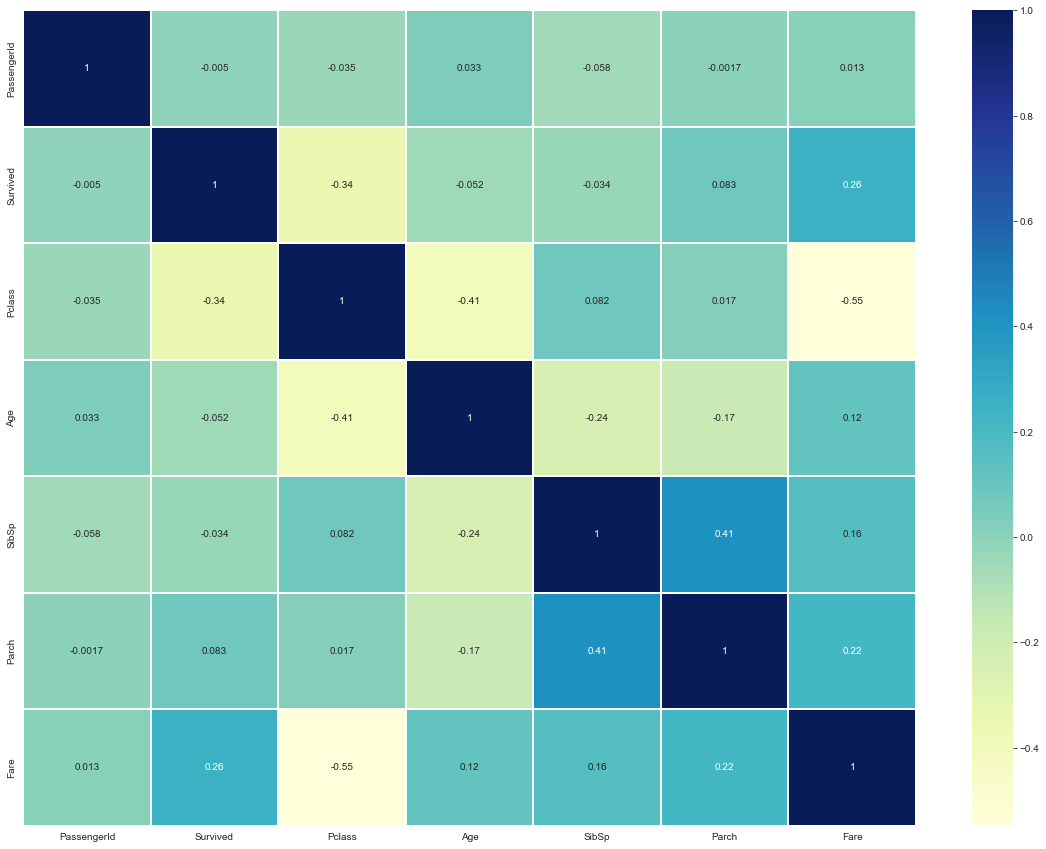

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu',linewidths=0.1)
plt.show()

In [28]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

#### now we don't have any null values in the data set

### afterthat i have to change categorical variable in numberical variable in the form of binary variable by using dummy varible 

In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
train_data.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [31]:
#dummy_df = pd.get_dummies(train_data)
#dummy_df

In [32]:
sex_empbark=pd.get_dummies(train_data[['Sex','Embarked']],drop_first=True)
sex_empbark

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [33]:
train=pd.concat([train_data,sex_empbark],axis=1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [35]:
train.shape

(889, 14)

### There is no need to Name,Sex,Ticket,Embarked bcz all these didn't affect the model so far

In [36]:
train.drop(["PassengerId","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [37]:
train.shape

(889, 9)

In [38]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Model building

In [39]:
X = train.drop("Survived",axis =1)
y = train["Survived"]

In [40]:
print("shape of X=" ,X.shape)
print("shape of y=" ,y.shape)

shape of X= (889, 8)
shape of y= (889,)


##### split the train data_set into train and test data

In [41]:
from sklearn.model_selection import train_test_split 

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=51)

### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc =StandardScaler()
sc.fit(X_train)

StandardScaler()

In [45]:
X_train_sc = sc.transform(X_train)
X_test_sc =sc.transform(X_test)

### Logistic Regression

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [47]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_classifier.score(X_test,y_test)

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8146067415730337

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [49]:
#Train with Standard scaled Data
logr = LogisticRegression()
logr.fit(X_train_sc,y_train)
y_pred_lr_sc = logr.predict(X_test_sc)
accuracy_score(y_test,y_pred_lr_sc)

0.8033707865168539

### DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state = 51)
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.7865168539325843

In [52]:
#train with standard scaled data
dtc2 = DecisionTreeClassifier(criterion='entropy',random_state = 51)
dtc2.fit(X_train_sc,y_train)
dtc2.score(X_test_sc,y_test)

0.7865168539325843

### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8089887640449438

### Support Vector Classifier


In [55]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.7303370786516854

In [56]:
# Train with Standard scaled Data
svc_classifier2 = SVC()
svc_classifier2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.7921348314606742

### K – Nearest Neighbor Classifier


In [57]:
#K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.7303370786516854

In [58]:
# Train with Standard scaled Data
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_classifier.predict(X_test_sc)
accuracy_score(y_test,y_pred_knn_sc)

0.3595505617977528

### Naive Bayes Classifier

In [59]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_nb)

0.8089887640449438

## now we have to predict the value of given test data test

In [60]:
test_data.shape

(418, 11)

In [61]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [63]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [64]:
test_data.isnull().sum()/test_data.shape[0]*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [65]:
test_data = test_data.drop(columns="Cabin" ,axis=1)

In [66]:
test_data.shape

(418, 10)

In [67]:
test_data["Age"] = test_data["Age"].replace(np.NaN,test_data["Age"].mean())

In [68]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [69]:
test_data = test_data.dropna()

In [70]:
test_data.isnull().sum().sum()

0

In [71]:
test_data.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [72]:
sex_empbard=pd.get_dummies(test_data[['Sex','Embarked']],drop_first=True)
sex_empbard

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1
...,...,...,...
413,1,0,1
414,0,0,0
415,1,0,1
416,1,0,1


In [73]:
test=pd.concat([test_data,sex_empbard],axis=1)

In [74]:
test.drop(["PassengerId","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [75]:
test.shape

(417, 8)

In [76]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [83]:
y_pred =nb_classifier.predict(test)

In [84]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [85]:
test_data['PassengerId'] = test_data['PassengerId'].astype(int)

In [86]:
submit_file_titanic = pd.concat([test_id,pd.DataFrame(y_pred)],axis=1)
submit_file_titanic.columns =['PassengerId','Survived']

In [87]:
submit_file_titanic

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,1.0
414,1306,0.0
415,1307,0.0
416,1308,0.0


In [89]:
submit_file_titanic.to_csv('titanic_submission_file1.csv',index=False)